In [16]:
pip install mplfinance


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import yfinance as yf
import pandas as pd

tickers = ["AAPL", "NVDA"]
data = yf.download(tickers, start="2020-01-01", end="2025-01-01")
data.to_csv("data/raw_stock_data.csv")


/tmp/ipykernel_706002/196698716.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  2 of 2 completed


In [5]:
print(f"Shape: {data.shape}")
print(f"Date Range: {data.index[0]} to {data.index[-1]}")
print(f"Total Days: {len(data)}")
print("\nFirst 10 rows:")
print(data.head(10))


Shape: (1719, 2)
Date Range: 2019-01-02 00:00:00 to 2025-10-31 00:00:00
Total Days: 1719

First 10 rows:
            Close_AAPL  Close_NVDA
Date                              
2019-01-02   37.538818    3.377354
2019-01-03   33.799679    3.173304
2019-01-04   35.242565    3.376611
2019-01-07   35.164116    3.555371
2019-01-08   35.834446    3.466858
2019-01-09   36.442993    3.535041
2019-01-10   36.559464    3.600743
2019-01-11   36.200512    3.689999
2019-01-14   35.656181    3.729917
2019-01-15   36.385937    3.715784


/tmp/ipykernel_476931/2508075350.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  2 of 2 completed


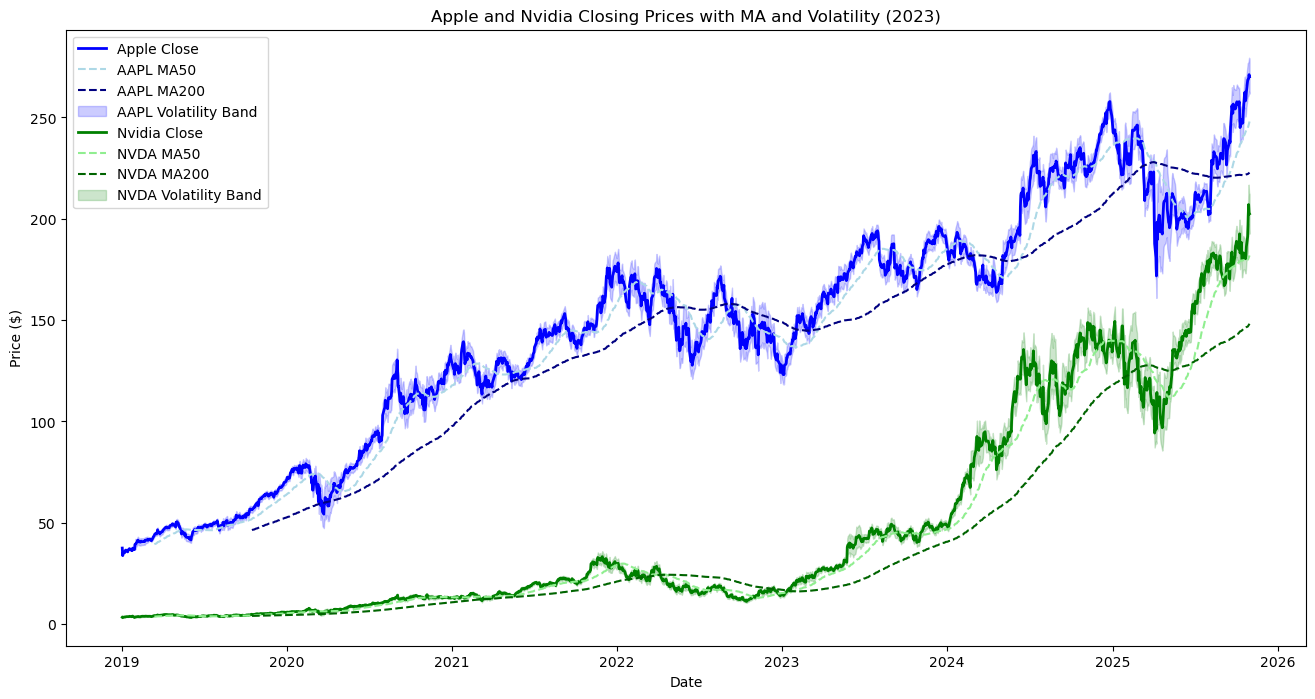

In [26]:
import yfinance as yf
import matplotlib.pyplot as plt

tickers = ['AAPL', 'NVDA']
start_date = '2019-01-01'
end_date = '2025-11-01'

data = yf.download(tickers, start=start_date, end=end_date)['Close']

data['AAPL_MA50'] = data['AAPL'].rolling(50).mean()
data['AAPL_MA200'] = data['AAPL'].rolling(200).mean()
data['NVDA_MA50'] = data['NVDA'].rolling(50).mean()
data['NVDA_MA200'] = data['NVDA'].rolling(200).mean()

data['AAPL_vol'] = data['AAPL'].pct_change().rolling(20).std()
data['NVDA_vol'] = data['NVDA'].pct_change().rolling(20).std()

plt.figure(figsize=(16,8))

plt.plot(data.index, data['AAPL'], label='Apple Close', color='blue', linewidth=2)
plt.plot(data.index, data['AAPL_MA50'], label='AAPL MA50', color='lightblue', linestyle='--')
plt.plot(data.index, data['AAPL_MA200'], label='AAPL MA200', color='navy', linestyle='--')
plt.fill_between(data.index, 
                 data['AAPL'] - 2*data['AAPL_vol']*data['AAPL'], 
                 data['AAPL'] + 2*data['AAPL_vol']*data['AAPL'], 
                 color='blue', alpha=0.2, label='AAPL Volatility Band')

plt.plot(data.index, data['NVDA'], label='Nvidia Close', color='green', linewidth=2)
plt.plot(data.index, data['NVDA_MA50'], label='NVDA MA50', color='lightgreen', linestyle='--')
plt.plot(data.index, data['NVDA_MA200'], label='NVDA MA200', color='darkgreen', linestyle='--')
plt.fill_between(data.index, 
                 data['NVDA'] - 2*data['NVDA_vol']*data['NVDA'], 
                 data['NVDA'] + 2*data['NVDA_vol']*data['NVDA'], 
                 color='green', alpha=0.2, label='NVDA Volatility Band')

plt.title('Apple and Nvidia Closing Prices with MA and Volatility (2023)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


/tmp/ipykernel_476931/2411940220.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')
[*********************100%***********************]  2 of 2 completed
/tmp/ipykernel_476931/2411940220.py:54: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cluster = df_cluster.fillna(method='bfill').fillna(method='ffill')


Cluster counts:
Cluster
0    841
2    526
1    352
Name: count, dtype: int64 

Cluster means:
         Return_AAPL  Return_NVDA  Volatility_AAPL  Volatility_NVDA  \
Cluster                                                               
0           0.000489     0.003119         0.016183         0.031658   
1           0.001138     0.001999         0.017253         0.030805   
2           0.002659     0.003084         0.021105         0.028886   

          MA50_AAPL  MA200_AAPL   MA50_NVDA  MA200_NVDA  
Cluster                                                  
0        155.742962  149.640918   30.007952   24.864347  
1        219.544039  211.164797  133.559333  115.396831  
2         69.539477   61.123299    6.910964    5.750166   



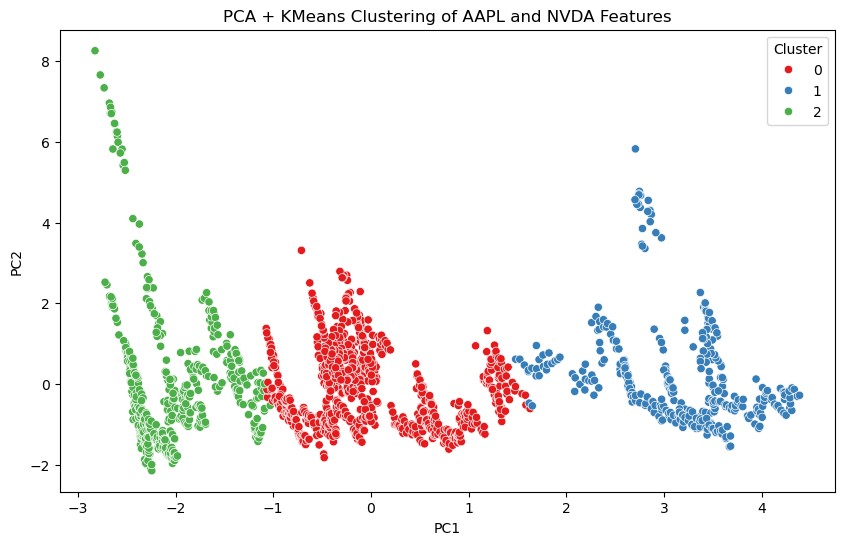

In [21]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

tickers = ['AAPL', 'NVDA']
start_date = '2019-01-01'
end_date = '2025-11-01'

data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

df = pd.DataFrame({
    'Close_AAPL': data['AAPL']['Close'],
    'Close_NVDA': data['NVDA']['Close']
})

df['Return_AAPL'] = df['Close_AAPL'].pct_change()
df['Return_NVDA'] = df['Close_NVDA'].pct_change()

df['Volatility_AAPL'] = df['Return_AAPL'].rolling(window=20).std()
df['Volatility_NVDA'] = df['Return_NVDA'].rolling(window=20).std()

df['MA50_AAPL'] = df['Close_AAPL'].rolling(50).mean()
df['MA200_AAPL'] = df['Close_AAPL'].rolling(200).mean()
df['MA50_NVDA'] = df['Close_NVDA'].rolling(50).mean()
df['MA200_NVDA'] = df['Close_NVDA'].rolling(200).mean()

features = ['Return_AAPL', 'Return_NVDA',
            'Volatility_AAPL', 'Volatility_NVDA',
            'MA50_AAPL', 'MA200_AAPL', 'MA50_NVDA', 'MA200_NVDA']

df_cluster = df[features]

df_cluster = df_cluster.fillna(method='bfill').fillna(method='ffill')


X_scaled = scaler.fit_transform(df_cluster)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df_pca['Cluster'] = clusters
df_cluster['Cluster'] = clusters

print("Cluster counts:")
print(df_cluster['Cluster'].value_counts(), "\n")

print("Cluster means:")
print(df_cluster.groupby('Cluster').mean(), "\n")

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set1')
plt.title('PCA + KMeans Clustering of AAPL and NVDA Features')
plt.show()

/tmp/ipykernel_679600/3097580946.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  2 of 2 completed
/tmp/ipykernel_679600/3097580946.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Cluster_AAPL'] = cluster_labels_aapl


Apple Cluster counts:
Cluster_AAPL
0    428
1    762
2    330
Name: count, dtype: int64

Apple Cluster means:
              Return_AAPL  Volatility_AAPL   MA50_AAPL  MA200_AAPL
Cluster_AAPL                                                      
0                0.000734         0.016271  213.419502  205.667028
1                0.000145         0.016521  152.825454  146.537495
2                0.004370         0.023579   85.213473   70.941054


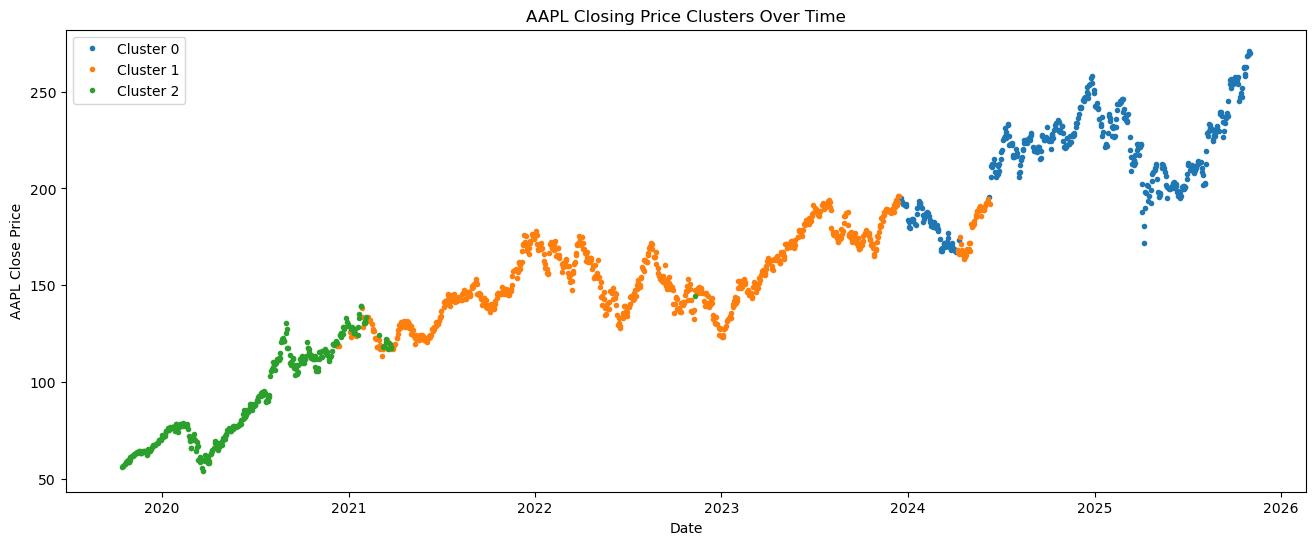

/tmp/ipykernel_679600/3097580946.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Cluster_NVDA'] = cluster_labels_nvda


Nvidia Cluster counts:
Cluster_NVDA
0    870
1    367
2    283
Name: count, dtype: int64

Nvidia Cluster means:
              Return_NVDA  Volatility_NVDA   MA50_NVDA  MA200_NVDA
Cluster_NVDA                                                      
0               -0.005760         0.026706   22.527355   18.519916
1                0.000341         0.030731  131.338078  112.814400
2                0.033397         0.044612   25.751364   22.005530


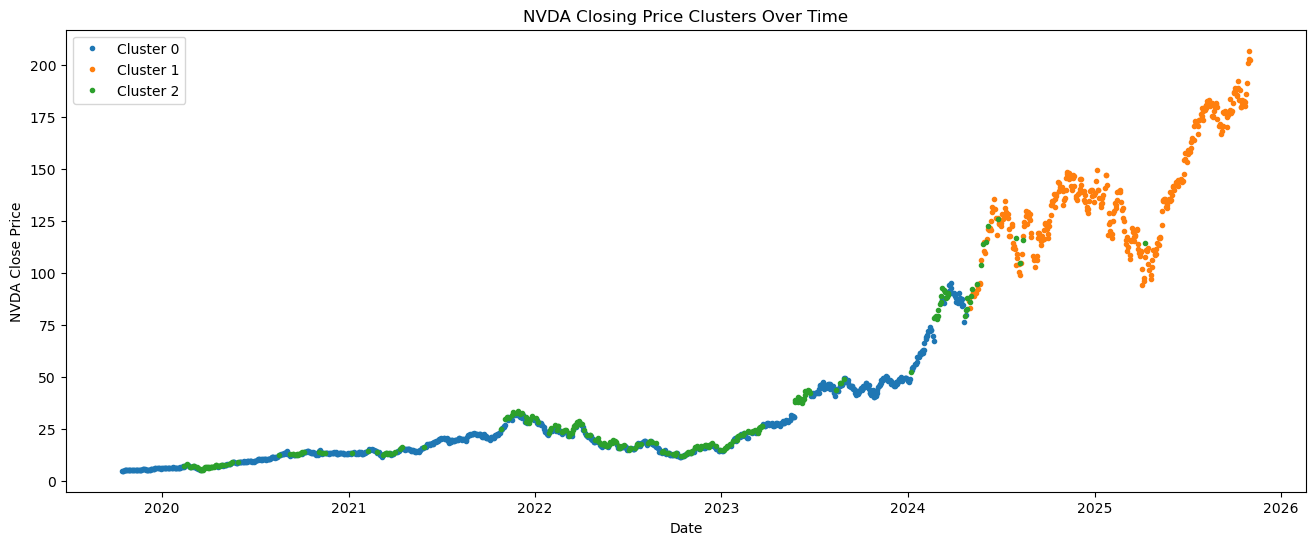

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

tickers = ['AAPL', 'NVDA']
start_date = '2019-01-01'
end_date = '2025-11-01'

data = yf.download(tickers, start=start_date, end=end_date)['Close']
data.columns = ['Close_AAPL', 'Close_NVDA']

df = data.copy()
df['Return_AAPL'] = df['Close_AAPL'].pct_change()
df['Return_NVDA'] = df['Close_NVDA'].pct_change()
df['Volatility_AAPL'] = df['Return_AAPL'].rolling(20).std()
df['Volatility_NVDA'] = df['Return_NVDA'].rolling(20).std()

df['MA50_AAPL'] = df['Close_AAPL'].rolling(50).mean()
df['MA200_AAPL'] = df['Close_AAPL'].rolling(200).mean()
df['MA50_NVDA'] = df['Close_NVDA'].rolling(50).mean()
df['MA200_NVDA'] = df['Close_NVDA'].rolling(200).mean()

df_cluster = df.dropna()

features_aapl = ['Return_AAPL','Volatility_AAPL','MA50_AAPL','MA200_AAPL']

scaler = StandardScaler()
X_aapl_scaled = scaler.fit_transform(df_cluster[features_aapl])

kmeans_aapl = KMeans(n_clusters=3, random_state=42)
cluster_labels_aapl = kmeans_aapl.fit_predict(X_aapl_scaled)
df_cluster['Cluster_AAPL'] = cluster_labels_aapl

print("Apple Cluster counts:")
print(df_cluster['Cluster_AAPL'].value_counts().sort_index())

print("\nApple Cluster means:")
print(df_cluster.groupby('Cluster_AAPL')[features_aapl].mean())

plt.figure(figsize=(16,6))
for cluster in sorted(df_cluster['Cluster_AAPL'].unique()):
    cluster_data = df_cluster[df_cluster['Cluster_AAPL'] == cluster]
    plt.plot(cluster_data.index, cluster_data['Close_AAPL'], '.', label=f'Cluster {cluster}')
plt.title('AAPL Closing Price Clusters Over Time')
plt.xlabel('Date')
plt.ylabel('AAPL Close Price')
plt.legend()
plt.show()

features_nvda = ['Return_NVDA','Volatility_NVDA','MA50_NVDA','MA200_NVDA']

X_nvda_scaled = scaler.fit_transform(df_cluster[features_nvda])

kmeans_nvda = KMeans(n_clusters=3, random_state=42)
cluster_labels_nvda = kmeans_nvda.fit_predict(X_nvda_scaled)
df_cluster['Cluster_NVDA'] = cluster_labels_nvda

print("Nvidia Cluster counts:")
print(df_cluster['Cluster_NVDA'].value_counts().sort_index())

print("\nNvidia Cluster means:")
print(df_cluster.groupby('Cluster_NVDA')[features_nvda].mean())

plt.figure(figsize=(16,6))
for cluster in sorted(df_cluster['Cluster_NVDA'].unique()):
    cluster_data = df_cluster[df_cluster['Cluster_NVDA'] == cluster]
    plt.plot(cluster_data.index, cluster_data['Close_NVDA'], '.', label=f'Cluster {cluster}')
plt.title('NVDA Closing Price Clusters Over Time')
plt.xlabel('Date')
plt.ylabel('NVDA Close Price')
plt.legend()
plt.show()


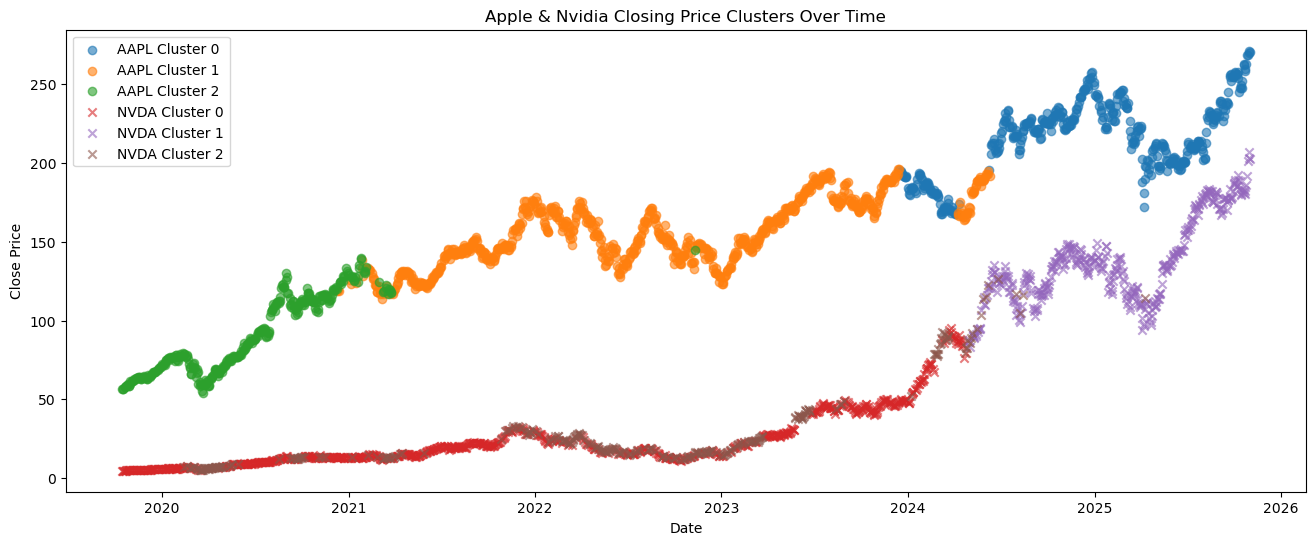

In [23]:
plt.figure(figsize=(16,6))

# Plot Apple
for cluster in sorted(df_cluster['Cluster_AAPL'].unique()):
    cluster_data = df_cluster[df_cluster['Cluster_AAPL'] == cluster]
    plt.scatter(cluster_data.index, cluster_data['Close_AAPL'], 
                label=f'AAPL Cluster {cluster}', alpha=0.6, marker='o')

# Plot Nvidia
for cluster in sorted(df_cluster['Cluster_NVDA'].unique()):
    cluster_data = df_cluster[df_cluster['Cluster_NVDA'] == cluster]
    plt.scatter(cluster_data.index, cluster_data['Close_NVDA'], 
                label=f'NVDA Cluster {cluster}', alpha=0.6, marker='x')

plt.title('Apple & Nvidia Closing Price Clusters Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [29]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

tickers = ['AAPL', 'NVDA']
start_date = '2019-01-01'
end_date = '2025-11-01'

data = yf.download(tickers, start=start_date, end=end_date)['Close']
data.columns = ['Close_AAPL', 'Close_NVDA']

df = data.copy()
df['Return_AAPL'] = df['Close_AAPL'].pct_change()
df['Return_NVDA'] = df['Close_NVDA'].pct_change()
df['Volatility_AAPL'] = df['Return_AAPL'].rolling(20).std()
df['Volatility_NVDA'] = df['Return_NVDA'].rolling(20).std()
df['MA50_AAPL'] = df['Close_AAPL'].rolling(50).mean()
df['MA200_AAPL'] = df['Close_AAPL'].rolling(200).mean()
df['MA50_NVDA'] = df['Close_NVDA'].rolling(50).mean()
df['MA200_NVDA'] = df['Close_NVDA'].rolling(200).mean()

df_cluster = df.dropna()

features = ['Return_AAPL','Return_NVDA','Volatility_AAPL','Volatility_NVDA',
            'MA50_AAPL','MA200_AAPL','MA50_NVDA','MA200_NVDA']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster[features])

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

df_cluster['Cluster'] = cluster_labels

cluster_counts = df_cluster['Cluster'].value_counts().sort_index()
cluster_means = df_cluster.groupby('Cluster')[features].mean()
cluster_stds = df_cluster.groupby('Cluster')[features].std()

cluster_summary = pd.concat([cluster_counts.rename('Count'), 
                             cluster_means.add_suffix('_Mean'), 
                             cluster_stds.add_suffix('_Std')], axis=1)

print(cluster_summary)


/tmp/ipykernel_476931/1252836970.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  2 of 2 completed

         Count  Return_AAPL_Mean  Return_NVDA_Mean  Volatility_AAPL_Mean  \
Cluster                                                                    
0          814          0.000271          0.002557              0.015939   
1          350          0.001163          0.001992              0.017296   
2          356          0.003480          0.005019              0.023332   

         Volatility_NVDA_Mean  MA50_AAPL_Mean  MA200_AAPL_Mean  \
Cluster                                                          
0                    0.031599      156.832430       151.052823   
1                    0.030802      219.779142       211.342240   
2                    0.029874       88.013179        73.513556   

         MA50_NVDA_Mean  MA200_NVDA_Mean  Return_AAPL_Std  Return_NVDA_Std  \
Cluster                                                                      
0             30.755997        25.409585         0.016630         0.033295   
1            133.785155       115.679365         0.019


/tmp/ipykernel_476931/1252836970.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Cluster'] = cluster_labels
